# **Delve Deeper**

We need sound conceptual foundation to be good Machine Learning Artists

## Leggo


## Structure of NN 

Layer1 = Input = X1, X2

Layer2 = Hidden = H1, H2

Layer3 = Output = H

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_hat(x):
    return sigmoid(x) * (1 - sigmoid(x))



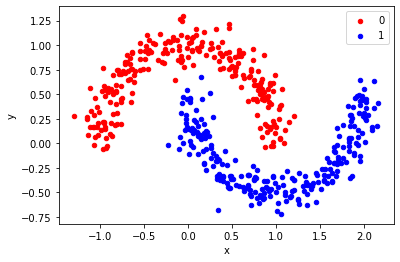

In [71]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
n = 500
X, y = make_moons(n_samples=n, noise=0.1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

datadict = {'X1': X[:,0],'X2' : X[:,1], 'target': y}
data = pd.DataFrame(data=datadict)


In [72]:
# Number of input units
D = 2
# Hidden units
U = 2 

# Initialize weights
weights_L1L2 = np.random.normal(scale= 1/D**.5, size=(D,U))
weights_L2L3 = np.random.normal(0, scale=0.1, size=(U, 1))
print(weights_L1L2)
epochs = 2000
lr = 0.2

[[ 0.63369217 -0.19259209]
 [-0.55996049  0.55821332]]


In [0]:
X = data.iloc[:, [0,1]].values
Y = data.iloc[:, 2].values

In [74]:
print(X.shape)
print(weights_L1L2.shape)
Layer2_input = np.dot(X, weights_L1L2)
print(Layer2_input.shape)

(500, 2)
(2, 2)
(500, 2)


In [0]:
Layer2_output = sigmoid(Layer2_input)

In [76]:
Layer3_input = np.dot(Layer2_output,weights_L2L3 )
print(Layer3_input.shape)

(500, 1)


In [77]:
Layer3_output = sigmoid(Layer3_input)
Layer3_output.shape

(500, 1)

## You know the problem? We need more derivatives? When we have a perceptron, we can just calculate the derivative wrt to weights in the output layer, but we have a hidden layer that needs more error terms, what must we do? 

In [78]:
print(Y.shape)

(500,)


In [80]:
error = Y.reshape(-1,1) - Layer3_output
print(error.shape)

(500, 1)


In [81]:
Layer3_error_term = error * Layer3_output * (1 - Layer3_output)
print(Layer3_error_term.shape)

(500, 1)


In [82]:
Layer2_error_term = np.dot(Layer3_error_term, weights_L2L3.T) * Layer2_output * (1 - Layer2_output)
print(Layer2_error_term.shape)

(500, 2)


In [83]:
delta_L2L3 = lr * Layer3_error_term * Layer2_output
print(delta_L2L3.shape)

(500, 2)


In [84]:
delta_L1L2 = lr * Layer2_error_term * X
print(delta_L1L2.shape)

(500, 2)
